In [1]:
import numpy as np
%pylab inline  
import GPy
import GPyOpt
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


### Baye_Opt
This notebook is mostly to explain the uses of bayesian optimization
- demonstartes the application of GPyOpt
- generate a simple optimizer, that outperforms gridsearch & randomsearch


The main theory of bayesian optimization is written extensively here:
- https://arxiv.org/pdf/1012.2599.pdf

This notebook is built off of, and uses code from:
- https://github.com/fmfn/BayesianOptimization
- https://github.com/thuijskens/bayesian-optimization
- https://sheffieldml.github.io/GPyOpt/

### 1-D function

In short the process suggests that we want to find the where $f(x)$ is greatest in for the **eg_function**: 

$$f(x) = 1-{(e^{-(x - 2)^2} + e^{-{(x - 6)^2}/{10}} + \frac{1}{(x^2 + 1)})}$$

In [2]:
def eg_function(x): return 1-(np.exp(-(x - 2)**2) + np.exp(-(x - 6)**2/10) + 1/(x**2 + 1))

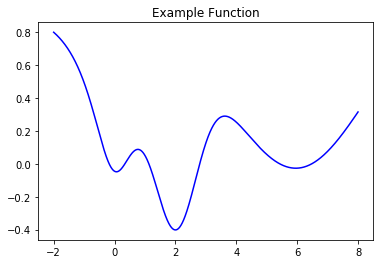

In [3]:
x = np.linspace(-2, 8, 10000).reshape(-1, 1)
y = eg_function(x)
plt.title('Example Function')
plt.plot(x, y, c='b');

- **Gridsearching** would search the param space symetrically and systematically.
    - thorough, inefficient, uniformity between samples may miss details 
- **Randomsearching** would search the param space randomly. 
    - efficient, less thorough, reliant on sufficent iterations
- *but neither learn from previously selected elements in the parameter space.*

- **Bayesian** however, does learn from previous elements, making 

In [4]:
#the upper and lower bounds seem to be -2:10 so we shall use that
grid_params = [np.linspace(-2,8,15)]   #10 equidistant values with bounds of param space  

rand_params = [np.linspace(-2,8,1000)] #1000 equidistant values with bounds of param space 
rand_iter   = 15                            #from which only 10 will be sampled

bay_params  = [{'name': 'var_1',  
               'type': 'continuous',    #1 continuous variable within bounds of param space
                'domain': (-2,8)}]
bay_iter    = 15                            #from which only 10 will be sampled

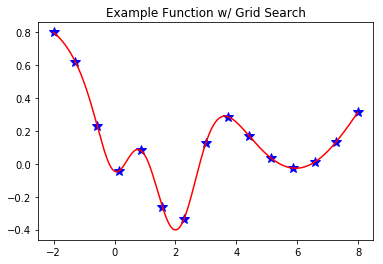

In [5]:
plt.title('Example Function w/ Grid Search')
for i in grid_params:
    plt.plot(i,eg_function(i),'*', markersize=10,c='b')
plt.plot(x, y,c='r');

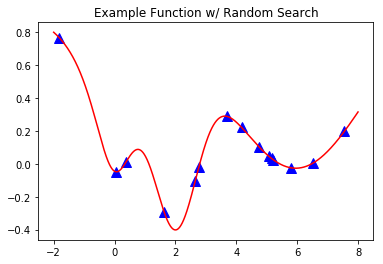

In [6]:
plt.title('Example Function w/ Random Search')
for i in range(rand_iter):
    v = np.random.choice(rand_params[0])
    plt.plot(v,eg_function(v),'^', markersize=10,c='b')
plt.plot(x, y,c='r');

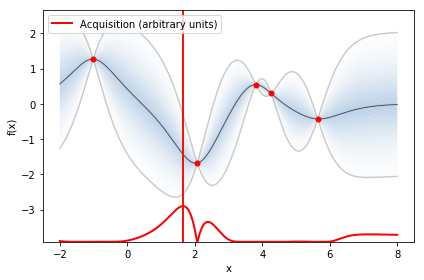

In [14]:
bay = GPyOpt.methods.BayesianOptimization(eg_function,
                                          bay_params,
                                          acquisition_type='EI',
                                         de_duplication=True,
                                         acquisition_weight = .001)

bay.run_optimization(0) #GPyOpt uses 5 points + the number listed
bay.plot_acquisition()

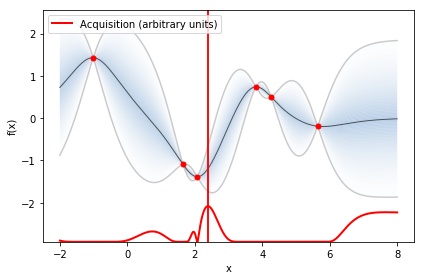

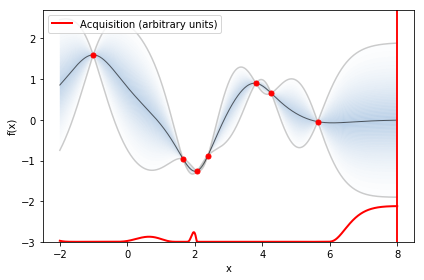

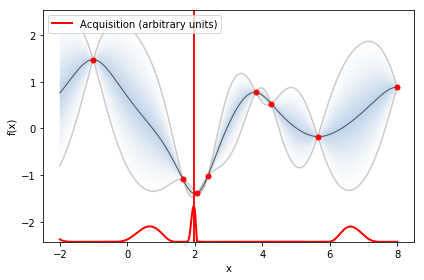

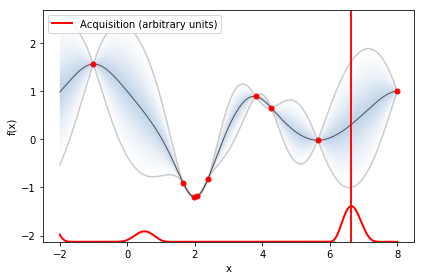

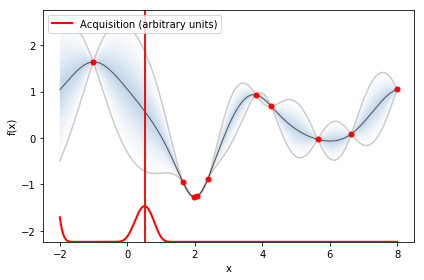

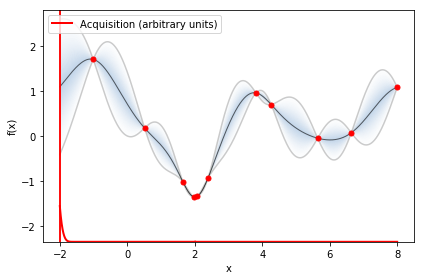

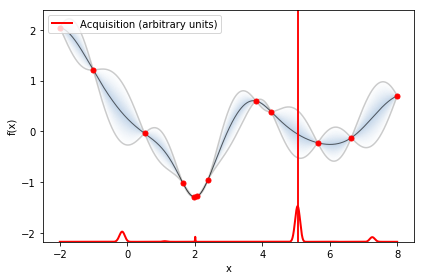

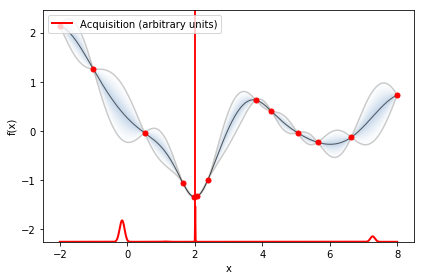

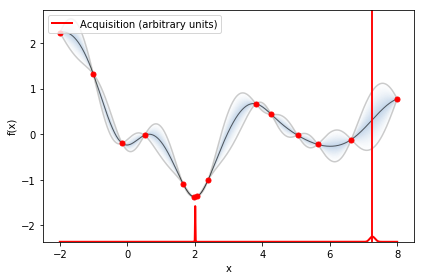

In [15]:
for i in range(9):
    bay.run_optimization(1)
    bay.plot_acquisition()
    plt.clf

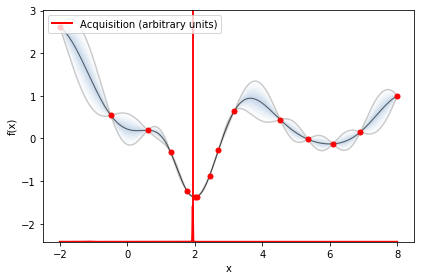

By 15 acquistions the optimizer's interpretation of the function resembles the true function


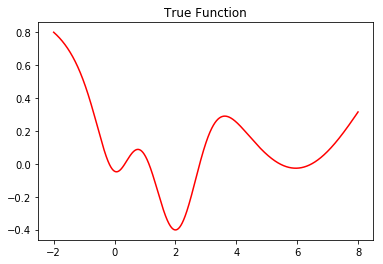

In [9]:
bay.run_optimization(1)
bay.plot_acquisition()

plt.title('True Function')
plt.plot(x, y,c='r')
print("By 15 acquistions the optimizer's interpretation of the function resembles the true function")

### 2-D model
In short the process suggests that we want to find the where $f(x)$ is greatest in for the **six_hump** equation: 
$$f(x_1,x_2) = \left(4-2.1x_1^2 + \frac{x_1^4}{3} \right)x_1^2 + x_1x_2 + (-4 +4x_2^2)x_2^2,$$

In [10]:
def six_hump(x):
    x1 = x[0][0]
    x2 = x[0][1]
    return (4 - 2.1*(x1**2) + (x1**4)/3.0)*(x1**2) + x1*x2 + (-4 + 4*(x2**2))*(x2**2)

In [186]:
space = [[x1 for x1 in np.linspace(-1,1,25)],[x2 for x2 in np.linspace(-1,1,25)]]

In [187]:
camel = [[six_hump([[i,j]]) for i in space[0]] for j in space[1]]

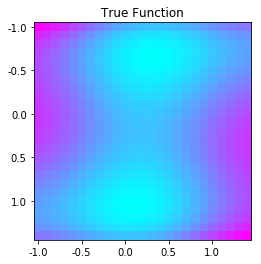

In [252]:
plt.imshow(camel, cmap='cool')
plt.title('True Function')
plt.xticks(range(0,25,5),[str(i) for i in np.linspace(-1,1,5)])
plt.yticks(range(0,25,5),[str(i) for i in np.linspace(-1,1,5)])
plt.show()

### Why we use it

In [223]:
%pylab inline 
import numpy as np
import GPyOpt
import GPy
from GPyOpt.experiment_design import initial_design
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [242]:
func  = GPyOpt.objective_examples.experimentsNd.alpine1(input_dim=2) 

mixed_domain =[{'name': 'var1_2', 'type': 'continuous', 'domain': (-1,1)},
               {'name': 'var5', 'type': 'continuous', 'domain': (-1,1)}]

space = GPyOpt.Design_space(mixed_domain)
data_init = 25

Note: in grid designs the total number of generated points is the smallest closest integer of n^d to the selected amount of points


Text(0.5,1,'Grid design')

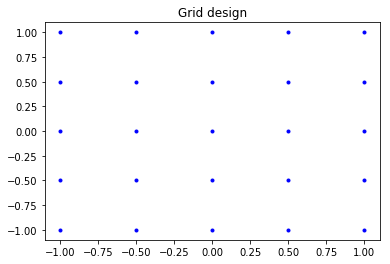

In [243]:
### --- Grid design
X = initial_design('grid',space,data_init)
plt.plot(X[:,0],X[:,1],'b.')
#plt.imshow(camel)
plt.title('Grid Search')

Text(0.5,1,'Random design')

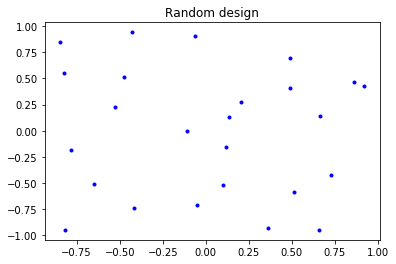

In [244]:
### --- Random initial design
X = initial_design('random',space,data_init)
plt.plot(X[:,0],X[:,1],'b.')
plt.title('Random Search')

Function after 5 Aquisitions


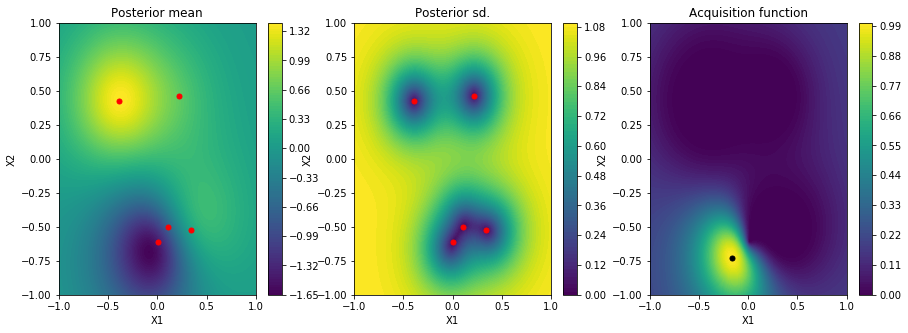

In [248]:
bay = GPyOpt.methods.BayesianOptimization(six_hump,
                                          mixed_domain,
                                          acquisition_type='EI',
                                          Maximize=True)
bay.run_optimization(0) #GPyOpt uses 5 points + the number listed
print('Function after 5 Aquisitions')
bay.plot_acquisition()

In [253]:
for i in range(2):
    print(i)

0
1


Function after 10 Aquisitions


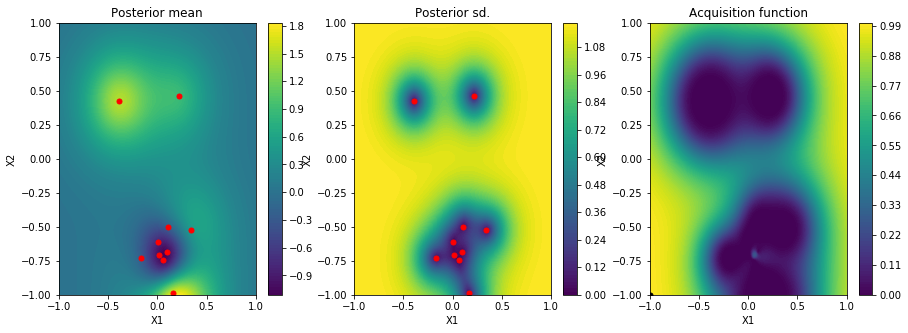

Function after 15 Aquisitions


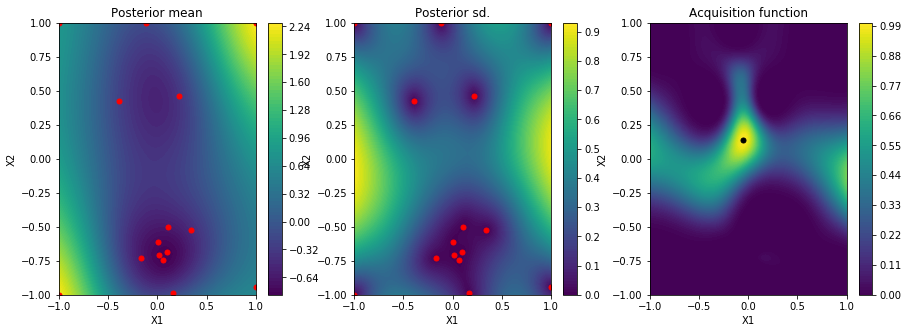

In [249]:
for i in range(3):
    bay.run_optimization(5)
    print('Function after {} Aquisitions'.format(str((i+2)*5)))
    bay.plot_acquisition()
    plt.clf

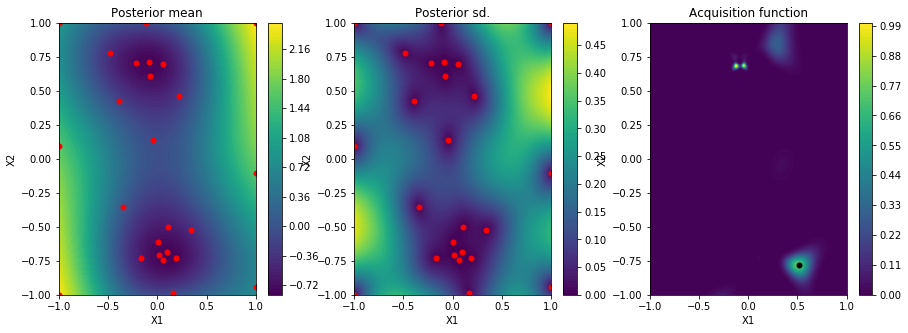

By 25 acquistions the optimizer's interpretation of the function resembles the true function


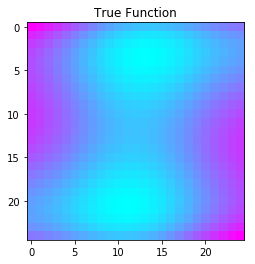

In [254]:
bay.run_optimization(5) 
bay.plot_acquisition()

print("By 25 acquistions the optimizer's interpretation of the function resembles the true function")

plt.imshow(camel, cmap='cool')
plt.title("True Function")
plt.show()